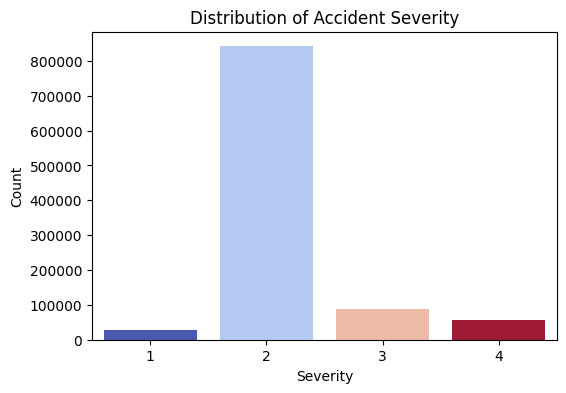

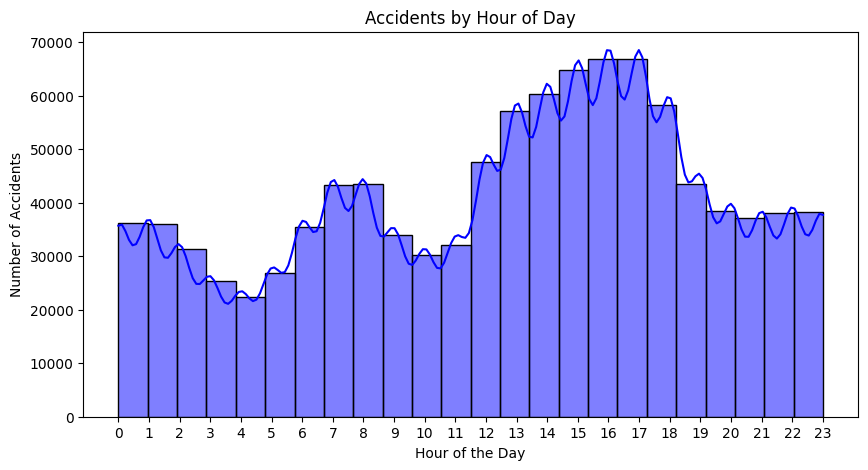

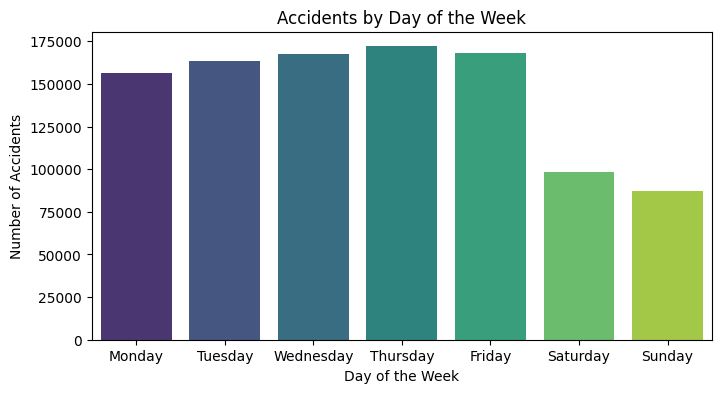

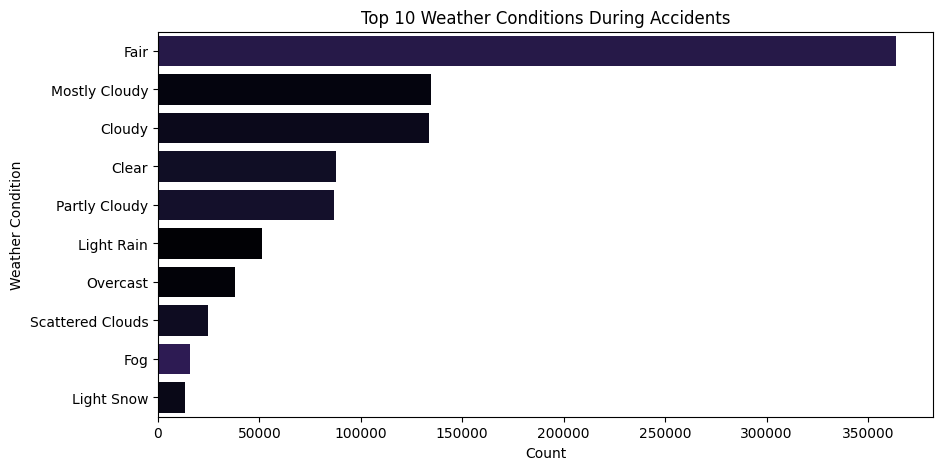

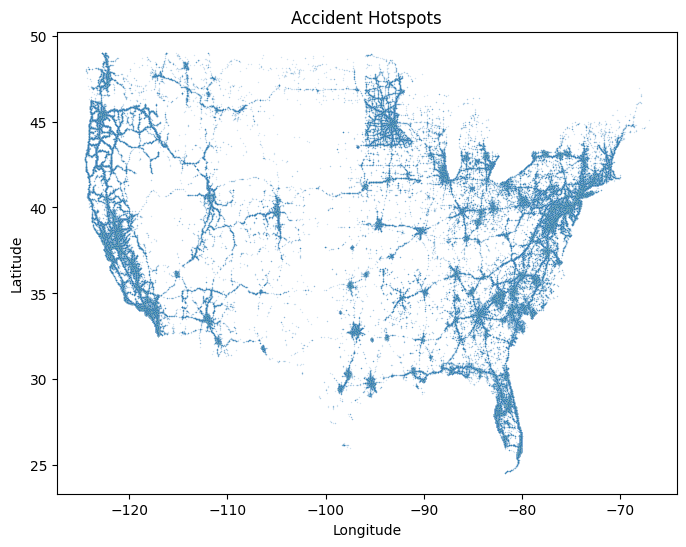

✅ Analysis Complete & Cleaned Data Saved!


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with proper dtype handling
file_path = "/content/US_Accidents.csv"
df = pd.read_csv(file_path, low_memory=False)

# Convert date-time column to datetime format with error handling
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce', dayfirst=True)

# Drop rows where 'Start_Time' couldn't be converted
df.dropna(subset=['Start_Time'], inplace=True)

# Extract useful time-related features
df.loc[:, 'Hour'] = df['Start_Time'].dt.hour
df.loc[:, 'DayOfWeek'] = df['Start_Time'].dt.day_name()

# --- Handling Missing Values ---
df.ffill(inplace=True)  # Forward-fill missing values

# --- Exploratory Data Analysis (EDA) ---

# 1️⃣ Distribution of Severity Levels
plt.figure(figsize=(6, 4))
sns.countplot(x='Severity', data=df, hue='Severity', legend=False, palette='coolwarm')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

# 2️⃣ Accidents per Hour
plt.figure(figsize=(10, 5))
sns.histplot(df['Hour'], bins=24, kde=True, color='blue')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.show()

# 3️⃣ Accidents per Day of the Week
plt.figure(figsize=(8, 4))
sns.countplot(x='DayOfWeek', data=df, hue='DayOfWeek', legend=False,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

# 4️⃣ Weather Conditions Analysis
plt.figure(figsize=(10, 5))
sns.countplot(y='Weather_Condition', data=df, hue='Weather_Condition', legend=False,
              order=df['Weather_Condition'].value_counts().index[:10], palette='magma')
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.show()

# 5️⃣ Accident Hotspots (Geographical Analysis)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Start_Lng'], y=df['Start_Lat'], alpha=0.2, s=1)
plt.title("Accident Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Save the cleaned dataset
df.to_csv("cleaned_accident_data.csv", index=False)

print("✅ Analysis Complete & Cleaned Data Saved!")
